<a href="https://colab.research.google.com/github/steve122192/Unit_1_Project/blob/master/Unit_1_Project_Steven_Reiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving mlb away.csv to mlb away.csv
Saving mlb home.csv to mlb home.csv
Saving players away.csv to players away.csv
Saving players home.csv to players home.csv
Saving teams home.csv to teams home.csv
Saving teams away.csv to teams away.csv


# Comparing Team Averages
I'll be comparing home away batting averages during specific scenarios to get an idea of how much better the Astro's pereformed at home (where they were accused of cheating) compared to the rest of the league.

I'll need to load home and away data sets, concatenate the two, then create a new column that represents the split between home & away averages for each team.

In [0]:
# Import Home Data
import pandas as pd
teams_home = pd.read_csv('teams home.csv')
teams_home.head()

,Season,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,2017,LAA,437,653,596,138,84,25,1,28,28,28,50,0,136,6,0,0,0,0,0,0.231544
1,2017,BAL,422,645,603,148,95,18,0,35,35,35,39,0,149,3,0,0,0,0,0,0.245439
2,2017,BOS,424,682,625,151,102,23,2,24,24,24,51,0,136,6,0,0,0,0,0,0.241600
3,2017,CHW,426,617,569,134,96,19,3,16,16,16,40,0,159,8,0,0,0,0,0,0.235501
4,2017,CLE,415,624,547,131,76,34,1,20,20,20,73,0,116,3,0,0,0,0,0,0.239488


In [0]:
# Import Away Data
teams_away = pd.read_csv('teams away.csv')
teams_away.head()

,Season,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,2017,LAA,468,692,624,138,92,30,1,15,15,15,61,0,139,7,0,0,0,0,0,0.221154
1,2017,BAL,411,597,566,145,79,40,3,23,23,23,26,0,134,5,0,0,0,0,0,0.256184
2,2017,BOS,467,689,625,161,102,40,1,18,18,18,59,0,118,5,0,0,0,0,0,0.257600
3,2017,CHW,423,625,585,153,101,24,0,28,28,28,34,0,132,6,0,0,0,0,0,0.261538
4,2017,CLE,392,546,496,133,74,29,4,26,26,26,46,0,100,4,0,0,0,0,0,0.268145


In [0]:
# Drop Unecessary Columns
teams_home = teams_home[['Tm','AB','H','AVG']]
teams_home.head()

,Tm,AB,H,AVG
0,LAA,596,138,0.231544
1,BAL,603,148,0.245439
2,BOS,625,151,0.241600
3,CHW,569,134,0.235501
4,CLE,547,131,0.239488


In [0]:
teams_away = teams_away[['Tm','AB','H','AVG']]
teams_away.head()

,Tm,AB,H,AVG
0,LAA,624,138,0.221154
1,BAL,566,145,0.256184
2,BOS,625,161,0.257600
3,CHW,585,153,0.261538
4,CLE,496,133,0.268145


In [0]:
# Rename Columns
teams_home.columns = ['team','home_at_bats','home_hits','home_avg']
teams_home.head()

,team,home_at_bats,home_hits,home_avg
0,LAA,596,138,0.231544
1,BAL,603,148,0.245439
2,BOS,625,151,0.241600
3,CHW,569,134,0.235501
4,CLE,547,131,0.239488


In [0]:
teams_away.columns = ['team','away_at_bats','away_hits','away_avg']
teams_away.head()

,team,away_at_bats,away_hits,away_avg
0,LAA,624,138,0.221154
1,BAL,566,145,0.256184
2,BOS,625,161,0.257600
3,CHW,585,153,0.261538
4,CLE,496,133,0.268145


In [0]:
teams_away = teams_away.drop('team',axis=1) #this column will be redundant when I concatenate the two

In [0]:
# Concatenate Home and Away Data Sets
teams = pd.concat([teams_home,teams_away], axis=1)
teams.head()

,team,home_at_bats,home_hits,home_avg,away_at_bats,away_hits,away_avg
0,LAA,596,138,0.231544,624,138,0.221154
1,BAL,603,148,0.245439,566,145,0.256184
2,BOS,625,151,0.241600,625,161,0.257600
3,CHW,569,134,0.235501,585,153,0.261538
4,CLE,547,131,0.239488,496,133,0.268145


In [0]:
# Create Split Column
teams['split'] = teams['home_avg']-teams['away_avg']
teams.head()

,team,home_at_bats,home_hits,home_avg,away_at_bats,away_hits,away_avg,split
0,LAA,596,138,0.231544,624,138,0.221154,0.010390
1,BAL,603,148,0.245439,566,145,0.256184,-0.010744
2,BOS,625,151,0.241600,625,161,0.257600,-0.016000
3,CHW,569,134,0.235501,585,153,0.261538,-0.026038
4,CLE,547,131,0.239488,496,133,0.268145,-0.028657


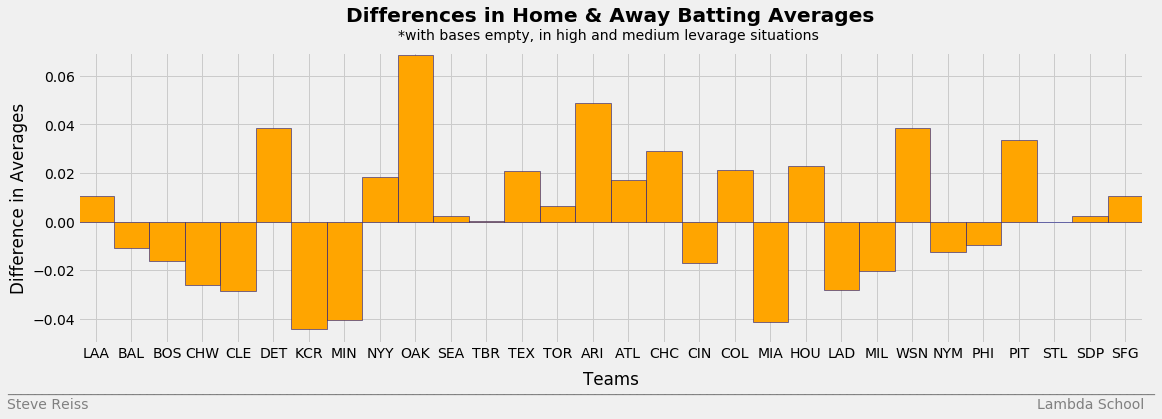

In [0]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(teams['team']))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,5))
plt.bar(y_pos, teams['split'], align='center', width=1, alpha=1, edgecolor='navy', color='orange')
plt.xticks(y_pos, teams['team'], color='black')
plt.ylabel('Difference in Averages', color='black', weight='300')
plt.title('Differences in Home & Away Batting Averages', weight='semibold', pad=30, color='black')
plt.margins(0)
plt.xlabel('Teams', labelpad=10, color='black', weight='300')
plt.yticks(color='black')
plt.ylim(-.05,.07)
plt.text(-2.5,-.07,'____________________________________________________________________________________________________________________________________________________________________',
         color='gray', weight='ultralight')
plt.text(-2.5,-.077,'Steve Reiss',color="gray")
plt.text(26.5,-.077,'Lambda School',color="gray")
plt.text(8.5, .075, '*with bases empty, in high and medium levarage situations')
plt.show()

# Comparing Differences in Home & Away Averages Among Astro's Hitters
I'll now go through the same process with data for individual players on the Astro's to see if any of them standout and are worth testing for significance.

I'll be comparing the players to the league as a whole so I'll have to add the league data to my player data sets.

In [0]:
# Import Home & Away League Data
mlb_home = pd.read_csv('mlb home.csv')
mlb_home.rename(columns={'League': 'Name'}, inplace=True)
mlb_home.head()

,Season,Name,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,2017,MLB,12516,18318,16636,4203,2677,794,73,659,659,659,1503,2,4060,173,0,0,0,0,0,0.252645


In [0]:
mlb_away = pd.read_csv('mlb away.csv')
mlb_away.rename(columns={'League': 'Name'}, inplace=True)
mlb_away.head()

,Season,Name,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,2017,MLB,13030,19002,17343,4316,2732,869,67,648,649,648,1474,1,4192,184,0,0,0,0,0,0.248861


In [0]:
# Import Home & Away Player Data
players_home = pd.read_csv('players home.csv')
players_home.drop(['Tm','playerId'], axis=1, inplace=True)
players_home.head()

,Season,Name,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,2017,Carlos Beltran,31,42,39,11,8,3,0,0,0,0,2,0,8,1,0,0,0,0,0,0.282051
1,2017,Josh Reddick,30,38,36,13,6,7,0,0,0,0,2,0,8,0,0,0,0,0,0,0.361111
2,2017,Brian McCann,21,29,27,7,4,0,0,3,3,3,0,0,6,2,0,0,0,0,0,0.259259
3,2017,Jose Altuve,33,44,40,16,11,2,1,2,2,2,3,0,7,1,0,0,0,0,0,0.400000
4,2017,Marwin Gonzalez,31,44,41,8,2,2,0,4,4,4,3,0,9,0,0,0,0,0,0,0.195122


In [0]:
players_away = pd.read_csv('players away.csv')
players_away.drop(['Tm','playerId'], axis=1, inplace=True)
players_away.head()

,Season,Name,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,2017,Carlos Beltran,25,36,33,9,3,4,0,2,2,2,3,0,6,0,0,0,0,0,0,0.272727
1,2017,Josh Reddick,31,43,40,12,8,4,0,0,0,0,3,0,6,0,0,0,0,0,0,0.300000
2,2017,Brian McCann,21,26,22,5,4,0,0,1,1,1,4,0,4,0,0,0,0,0,0,0.227273
3,2017,Jose Altuve,31,37,35,15,11,3,0,1,1,1,2,0,5,0,0,0,0,0,0,0.428571
4,2017,Marwin Gonzalez,37,49,41,11,7,3,0,1,1,1,6,0,10,2,0,0,0,0,0,0.268293


In [0]:
# Add league data to player data
players_home = pd.concat([players_home,mlb_home], axis=0)
players_home.head()

,Season,Name,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
0,2017,Carlos Beltran,31,42,39,11,8,3,0,0,0,0,2,0,8,1,0,0,0,0,0,0.282051
1,2017,Josh Reddick,30,38,36,13,6,7,0,0,0,0,2,0,8,0,0,0,0,0,0,0.361111
2,2017,Brian McCann,21,29,27,7,4,0,0,3,3,3,0,0,6,2,0,0,0,0,0,0.259259
3,2017,Jose Altuve,33,44,40,16,11,2,1,2,2,2,3,0,7,1,0,0,0,0,0,0.400000
4,2017,Marwin Gonzalez,31,44,41,8,2,2,0,4,4,4,3,0,9,0,0,0,0,0,0,0.195122


In [0]:
players_away = pd.concat([players_away,mlb_away], axis=0)
players_away.tail()

,Season,Name,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG
8,2017,Norichika Aoki,34,53,48,12,6,4,0,2,2,2,5,0,8,0,0,0,0,0,0,0.250000
9,2017,Carlos Correa,26,37,35,8,7,1,0,0,0,0,2,0,9,0,0,0,0,0,0,0.228571
10,2017,Alex Bregman,32,41,35,11,7,2,1,1,1,1,6,0,10,0,0,0,0,0,0,0.314286
11,2017,Yuli Gurriel,34,41,40,11,8,2,0,1,1,1,1,0,3,0,0,0,0,0,0,0.275000
0,2017,MLB,13030,19002,17343,4316,2732,869,67,648,649,648,1474,1,4192,184,0,0,0,0,0,0.248861


In [0]:
# Drop unecessary columns
players_home = players_home[['Name','AB','H','AVG']]
players_home.head()

,Name,AB,H,AVG
0,Carlos Beltran,39,11,0.282051
1,Josh Reddick,36,13,0.361111
2,Brian McCann,27,7,0.259259
3,Jose Altuve,40,16,0.400000
4,Marwin Gonzalez,41,8,0.195122


In [0]:
players_away = players_away[['Name','AB','H','AVG']]
players_away.head()

,Name,AB,H,AVG
0,Carlos Beltran,33,9,0.272727
1,Josh Reddick,40,12,0.300000
2,Brian McCann,22,5,0.227273
3,Jose Altuve,35,15,0.428571
4,Marwin Gonzalez,41,11,0.268293


In [0]:
# Rename Columns
players_home.columns = ['Name','home_at_bats','home_hits','home_avg']
players_home.head()

,Name,home_at_bats,home_hits,home_avg
0,Carlos Beltran,39,11,0.282051
1,Josh Reddick,36,13,0.361111
2,Brian McCann,27,7,0.259259
3,Jose Altuve,40,16,0.400000
4,Marwin Gonzalez,41,8,0.195122


In [0]:
players_away.columns = ['Name','away_at_bats','away_hits','away_avg']
players_away.head()

,Name,away_at_bats,away_hits,away_avg
0,Carlos Beltran,33,9,0.272727
1,Josh Reddick,40,12,0.300000
2,Brian McCann,22,5,0.227273
3,Jose Altuve,35,15,0.428571
4,Marwin Gonzalez,41,11,0.268293


In [0]:
players_away = players_away.drop('Name',axis=1) # This column will become redundant when we merge the dataframes

In [0]:
# Concatenate Home and Away Data Sets
players = pd.concat([players_home,players_away], axis=1)
players.head(40)

,Name,home_at_bats,home_hits,home_avg,away_at_bats,away_hits,away_avg
0,Carlos Beltran,39,11,0.282051,33,9,0.272727
1,Josh Reddick,36,13,0.361111,40,12,0.300000
2,Brian McCann,27,7,0.259259,22,5,0.227273
3,Jose Altuve,40,16,0.400000,35,15,0.428571
4,Marwin Gonzalez,41,8,0.195122,41,11,0.268293
5,Evan Gattis,25,7,0.280000,29,6,0.206897
6,Jake Marisnick,21,8,0.380952,9,1,0.111111
7,George Springer,97,30,0.309278,94,25,0.265957
8,Norichika Aoki,29,7,0.241379,48,12,0.250000
9,Carlos Correa,38,11,0.289474,35,8,0.228571


In [0]:
players.reset_index(drop=True, inplace=True)
players.head(40)

,Name,home_at_bats,home_hits,home_avg,away_at_bats,away_hits,away_avg
0,Carlos Beltran,39,11,0.282051,33,9,0.272727
1,Josh Reddick,36,13,0.361111,40,12,0.300000
2,Brian McCann,27,7,0.259259,22,5,0.227273
3,Jose Altuve,40,16,0.400000,35,15,0.428571
4,Marwin Gonzalez,41,8,0.195122,41,11,0.268293
5,Evan Gattis,25,7,0.280000,29,6,0.206897
6,Jake Marisnick,21,8,0.380952,9,1,0.111111
7,George Springer,97,30,0.309278,94,25,0.265957
8,Norichika Aoki,29,7,0.241379,48,12,0.250000
9,Carlos Correa,38,11,0.289474,35,8,0.228571


In [0]:
# Consolidate Player Names

In [0]:
players.at[0, 'Name'] = 'C.Bel'
players.at[1, 'Name'] = 'J.Red'
players.at[2, 'Name'] = 'B.Mc'
players.at[3, 'Name'] = 'J.Alt'
players.at[4, 'Name'] = 'M.Gon'
players.at[5, 'Name'] = 'E.Gat'
players.at[6, 'Name'] = 'J.Mar'
players.at[7, 'Name'] = 'G.Spr'
players.at[8, 'Name'] = 'N.Aok'
players.at[9, 'Name'] = 'C.Cor'
players.at[10, 'Name'] = 'A.Bre'
players.at[11, 'Name'] = 'Y.Gur'
players.head(40)

,Name,home_at_bats,home_hits,home_avg,away_at_bats,away_hits,away_avg
0,C.Bel,39,11,0.282051,33,9,0.272727
1,J.Red,36,13,0.361111,40,12,0.300000
2,B.Mc,27,7,0.259259,22,5,0.227273
3,J.Alt,40,16,0.400000,35,15,0.428571
4,M.Gon,41,8,0.195122,41,11,0.268293
5,E.Gat,25,7,0.280000,29,6,0.206897
6,J.Mar,21,8,0.380952,9,1,0.111111
7,G.Spr,97,30,0.309278,94,25,0.265957
8,N.Aok,29,7,0.241379,48,12,0.250000
9,C.Cor,38,11,0.289474,35,8,0.228571


In [0]:
# Create Split Column
players['split'] = players['home_avg']-players['away_avg']
players.head()

,Name,home_at_bats,home_hits,home_avg,away_at_bats,away_hits,away_avg,split
0,C.Bel,39,11,0.282051,33,9,0.272727,0.009324
1,J.Red,36,13,0.361111,40,12,0.300000,0.061111
2,B.Mc,27,7,0.259259,22,5,0.227273,0.031987
3,J.Alt,40,16,0.400000,35,15,0.428571,-0.028571
4,M.Gon,41,8,0.195122,41,11,0.268293,-0.073171


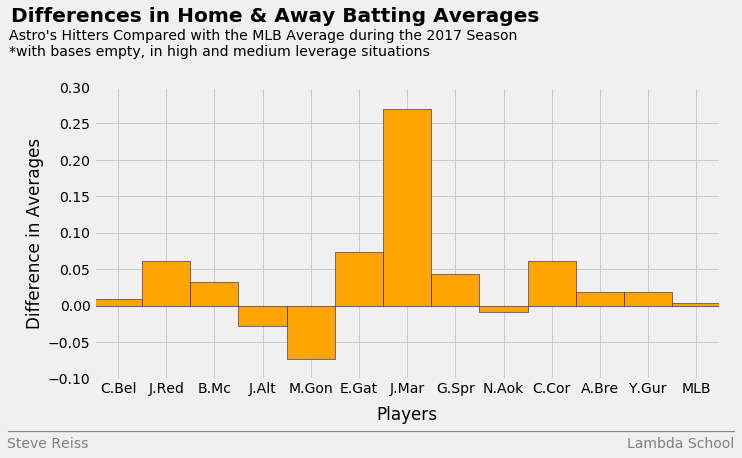

In [0]:
y_pos = np.arange(len(players['Name']))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.bar(y_pos, players['split'], align='center', width=1, alpha=1, edgecolor='navy', color='orange')
plt.xticks(y_pos, players['Name'], color='black')
plt.ylabel('Difference in Averages', color='black', weight='300')
plt.title('Differences in Home & Away Batting Averages', weight='semibold', pad=65, color='black', x=.29)
plt.margins(0)
plt.xlabel('Players', labelpad=10, color='black', weight='300')
plt.yticks(color='black')
plt.ylim(-.1,.3)
plt.text(-2.3,-.17,'________________________________________________________________________________________________________',
         color='gray', weight='ultralight')
plt.text(-2.27, .3425, "Astro's Hitters Compared with the MLB Average during the 2017 Season \n*with bases empty, in high and medium leverage situations")
plt.text(-2.3,-.195,'Steve Reiss',color="gray")
plt.text(10.56,-.195,'Lambda School',color="gray")
plt.show()

# T Tests
I'll now be running T tests to determine if the players in question have an additional advantage when batting at home compared to the rest of the league.

The null hypothesis is that the players in question have the same home-feld advantage as the rest of the league when batting.

The alternative hypothesis is that the players in question have a different home-field advantage (possibly greater) than the rest of the league when batting.d

In [0]:
Jake Marisnick

In [0]:
# Import away player data
jmar_away = pd.read_csv('marisnick away.csv')

,Date,Name,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,playerId
0,2017-04-11,Jake Marisnick,HOU,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.000000,11339
1,2017-04-12,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,11339
2,2017-04-15,Jake Marisnick,HOU,1,4,3,2,2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0.666667,11339
3,2017-04-21,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,11339
4,2017-04-22,Jake Marisnick,HOU,1,3,3,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333333,11339


In [0]:
# Drop games with no at bats. These count as a 0 for average in the data but they
# shouldn't count against a players average so we'll remove them.
jmar_away.drop(jmar_away[jmar_away['AB'] == 0 ].index, inplace=True)
jmar_away.head()

,Date,Name,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,playerId
1,2017-04-12,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,11339
2,2017-04-15,Jake Marisnick,HOU,1,4,3,2,2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0.666667,11339
3,2017-04-21,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,11339
4,2017-04-22,Jake Marisnick,HOU,1,3,3,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333333,11339
5,2017-04-23,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,11339


In [0]:
# I subtracted his average for each away game from his season home average to get
# the 'split' column. This measures the difference of each away game average from 
# what would be expected if there were no advantage when hitting at home. 
jmar_away["split"] = .313-jmar_away['AVG']
jmar_away.head()

,Date,Name,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,playerId,split
1,2017-04-12,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,11339,0.313000
2,2017-04-15,Jake Marisnick,HOU,1,4,3,2,2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0.666667,11339,-0.353667
3,2017-04-21,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,11339,0.313000
4,2017-04-22,Jake Marisnick,HOU,1,3,3,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333333,11339,-0.020333
5,2017-04-23,Jake Marisnick,HOU,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,11339,0.313000


In [0]:
jmar_away['split'].mean()

0.12894202906521735

In [0]:
# 1 Sample T Test. Comparing the average sample split with the known league split.
from scipy.stats import ttest_1samp
ttest_1samp(jmar_away['split'], 0.011272)

Ttest_1sampResult(statistic=2.824909127293222, pvalue=0.0070257434199645355)

**In this case, we reject the null hypothesis that Jake Marisnick had no additional home-field advantage when hitting. We are 99.3% confident that the difference observed between Marisnick's average home/away split and the league's home/away split is due to randomness.**

In [0]:
# Same process for the player with the next largest split
import pandas as pd
reddick_away = pd.read_csv('reddick away.csv')
reddick_away.head()

,Date,Name,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,playerId
0,2017-04-10,Josh Reddick,HOU,1,4,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.000000,3892
1,2017-04-11,Josh Reddick,HOU,1,2,2,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,3892
2,2017-04-12,Josh Reddick,HOU,1,5,3,2,2,0,0,0,3,2,1,0,0,0,1,0,0,0,0,0.666667,3892
3,2017-04-14,Josh Reddick,HOU,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3892
4,2017-04-15,Josh Reddick,HOU,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.000000,3892


In [0]:
reddick_away.drop(reddick_away[reddick_away['AB'] == 0 ].index, inplace=True)
reddick_away.head()

,Date,Name,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,playerId
0,2017-04-10,Josh Reddick,HOU,1,4,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.000000,3892
1,2017-04-11,Josh Reddick,HOU,1,2,2,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,3892
2,2017-04-12,Josh Reddick,HOU,1,5,3,2,2,0,0,0,3,2,1,0,0,0,1,0,0,0,0,0.666667,3892
3,2017-04-14,Josh Reddick,HOU,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3892
4,2017-04-15,Josh Reddick,HOU,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.000000,3892


In [0]:
reddick_away["split"] = .344-reddick_away['AVG']
reddick_away.head()

,Date,Name,Tm,G,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,playerId,split
0,2017-04-10,Josh Reddick,HOU,1,4,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.000000,3892,0.344000
1,2017-04-11,Josh Reddick,HOU,1,2,2,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,3892,-0.656000
2,2017-04-12,Josh Reddick,HOU,1,5,3,2,2,0,0,0,3,2,1,0,0,0,1,0,0,0,0,0.666667,3892,-0.322667
3,2017-04-14,Josh Reddick,HOU,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3892,0.344000
4,2017-04-15,Josh Reddick,HOU,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.000000,3892,0.344000


In [0]:
reddick_away['split'].mean()

0.036447916718749945

In [0]:
ttest_1samp(reddick_away['split'], 0.011272)

Ttest_1sampResult(statistic=0.7182072513550022, pvalue=0.4752846247754884)

**In this case, we fail to reject the null hypothesis that Jake Marisnick had no additional home-field advantage when hitting.**